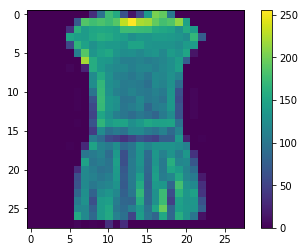

In [5]:
# CLOTHES CLASSIFICATION

# Import librairies
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess the data
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

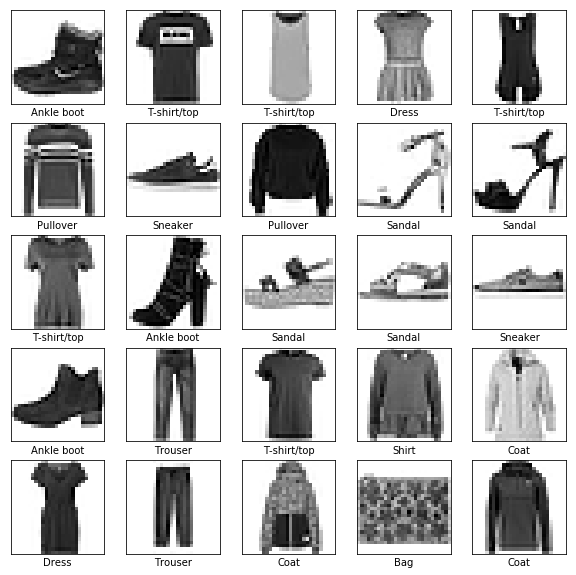

In [6]:
# Training set and Test set
train_images = train_images / 255.0
test_images = test_images / 255.0

# Display the first 25 images to verify that the data is in the correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5,i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
# Build the model

# Set up the layers
model = keras.Sequential([
	keras.layers.Flatten(input_shape=(28,28)),
	keras.layers.Dense(128,activation='relu'),
	keras.layers.Dense(10,activation='softmax')
])

# Compile the model
model.compile(optimizer = 'adam',
		   loss = 'sparse_categorical_crossentropy',
		   metrics=['accuracy'])
		   
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4977 - acc: 0.8244
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3704 - acc: 0.8653
Epoch 3/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3354 - acc: 0.8771
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3092 - acc: 0.8862
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2921 - acc: 0.8918
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2774 - acc: 0.8961
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2677 - acc: 0.8998
Epoch 8/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2544 - acc: 0.9053
Epoch 9/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2465 - acc: 0.9089
Epoch 10/10
60000/60000 [==============================] - 3s 45us/sample - loss: 

In [9]:
# Evaluate accuracy
test_loss,test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_images)
predictions[0]

10000/10000 - 0s - loss: 0.3447 - acc: 0.8811

Test accuracy: 0.8811


array([2.8115386e-07, 4.1743579e-12, 9.0434654e-10, 2.0392146e-11,
       9.5870398e-08, 3.1578122e-04, 4.4841684e-08, 8.7064076e-03,
       1.0658571e-09, 9.9097741e-01], dtype=float32)

In [10]:
np.argmax(predictions[0])
test_labels[0]

9

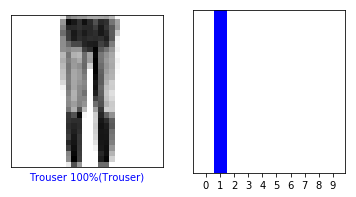

In [11]:
def plot_image(i,predictions_array,true_label,img):
	predictions_array, true_label, img = predictions_array, true_label[i], img[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	
	plt.imshow(img,cmap=plt.cm.binary)
	
	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'
		
	plt.xlabel("{} {:2.0f}%({})".format(class_names[predicted_label],
						    100*np.max(predictions_array),
						    class_names[true_label]),
						    color=color)
						
def plot_value_array(i,predictions_array, true_label):
	predictions_array, true_label, = predictions_array, true_label[i]
	plt.grid(False)
	plt.xticks(range(10))
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color = "#777777")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)
	
	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')
	
# Verify predictions
# Let's look at the 3rd image

i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

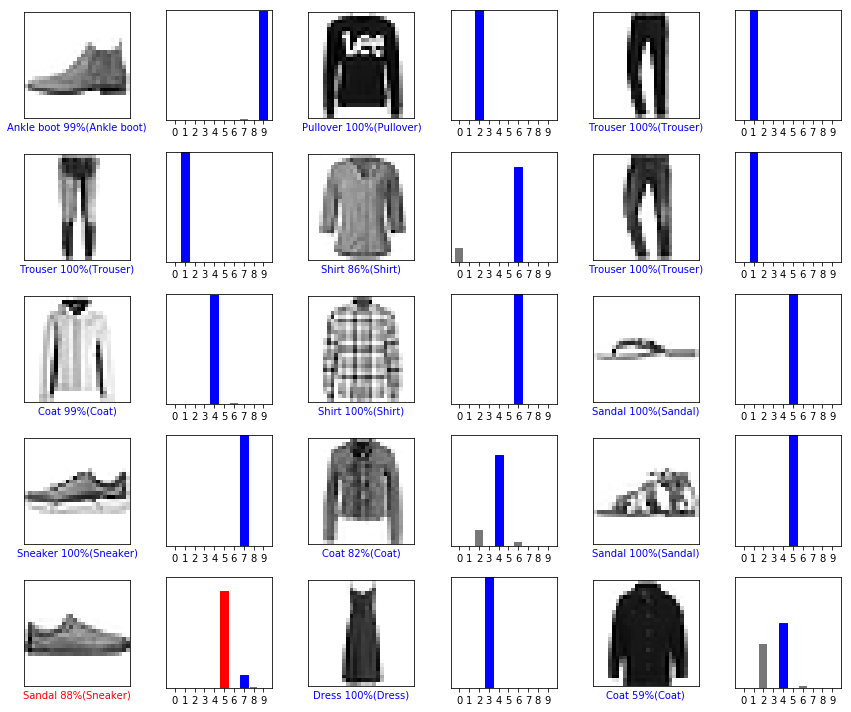

In [12]:
# Let's plot several images with their predictions
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
	plt.subplot(num_rows, 2*num_cols, 2*i+1)
	plot_image(i,predictions[i],test_labels,test_images)
	plt.subplot(num_rows,2*num_cols,2*i+2)
	plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[6.1088591e-05 1.1609303e-16 9.9974316e-01 2.9520147e-11 1.4495409e-04
  2.2118581e-12 5.0760074e-05 4.7765337e-16 2.6060569e-12 1.0774854e-14]]


2

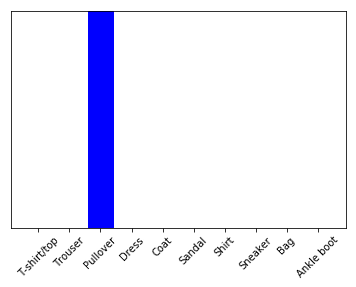

In [13]:
# Use the trained model
img = test_images[1]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(1,predictions_single[0],test_labels) 
_ = plt.xticks(range(10),class_names, rotation=45)
np.argmax(predictions_single[0])